In [108]:
# Import required packages here (after they are installed)
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
from pylab import show
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
import time
import math

In [63]:
features = np.loadtxt("features.csv")
labels = np.loadtxt("labels.csv")
print(features)
print(labels)

[[ 0.266074  0.109171  0.207175 ...  0.465775 -0.154186  1.867521]
 [ 0.266074  0.415367  0.089814 ... -0.586191  0.251173 -0.873779]
 [ 2.105308 -0.079257  0.239183 ... -2.179147 -1.463808  0.41348 ]
 ...
 [ 0.204355  0.360409  0.139604 ... -0.10331   2.808053 -1.910991]
 [-0.412837 -0.707352  0.356544 ...  1.560843  0.968347  0.192678]
 [ 0.006853 -0.055704  0.335206 ...  1.169234  0.469443  0.06974 ]]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 0

In [64]:
print("Number of features:", len(features[0]))
print("Length of features dataset:", len(features))
print("Length of labels dataset:", len(labels))

Number of features: 10
Length of features dataset: 1000
Length of labels dataset: 1000


In [65]:
#Dividing into train and test sets
numTrain = int(len(features)*.8)

trainFeatures = features[:numTrain]
testFeatures = features[numTrain:]
trainLabels = labels[:numTrain]
testLabels = labels[numTrain:]

In [66]:
layers = [1,2,5,10]
nodes = [2,5,10,50,100]

### LAYER 1 - RELU

In [67]:
cv_scores_1 = []
cv_errors_1 = []
run_times_1 = []
for n in nodes:
    start_time = time.time()*1000
    #Neural Network Model 
    print('LAYER-1; NODES-{}'.format(n))
    perceptron = MLPClassifier(hidden_layer_sizes=(n), activation='relu', solver='adam', alpha=0, max_iter=10000, epsilon=0.001)
    print(perceptron)
    
    #Cross-validation scores
    cv_score = cross_val_score(perceptron, trainFeatures, trainLabels, cv=10)
    cv_mean = np.mean(cv_score)
    print(cv_score)
    cv_scores_1.append(cv_mean)
    print("Cross validation Mean:", cv_mean)
    
    #Cross-validation errors
    cv_error = 1-cv_mean
    cv_errors_1.append(cv_error)
    print('Cross validation error:', cv_error)
    end_time = time.time()*1000
    runtime = end_time - start_time
    run_times_1.append(runtime)
    print('Run Time:', runtime)

LAYER-1; NODES-2
MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=2, learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
[0.67901235 0.69135802 0.74074074 0.66666667 0.59259259 0.65822785
 0.65822785 0.72151899 0.67088608 0.75949367]
Cross validation Mean: 0.6838724800750118
Cross validation error: 0.3161275199249882
Run Time: 5455.322509765625
LAYER-1; NODES-5
MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=5, learning_rate='constant',
              learning_rate_init=0.001, max_iter=10

### LAYER 2 - RELU

In [68]:
cv_scores_2 = []
cv_errors_2 = []
run_times_2 = []
for n in nodes:
    start_time = time.time()*1000
    #Neural Network Model 
    print('LAYER-2; NODES-{}'.format(n))
    perceptron = MLPClassifier(hidden_layer_sizes=(n, n), activation='relu', solver='adam', alpha=0, max_iter=10000, epsilon=0.001)
    print(perceptron)
    
    #Cross-validation scores
    cv_score = cross_val_score(perceptron, trainFeatures, trainLabels, cv=10)
    cv_mean = np.mean(cv_score)
    print(cv_score)
    cv_scores_2.append(cv_mean)
    print("Cross validation Mean:", cv_mean)
    
    #Cross-validation errors
    cv_error = 1-cv_mean
    cv_errors_2.append(cv_error)
    print('Cross validation error:', cv_error)
    end_time = time.time()*1000
    runtime = end_time - start_time
    run_times_2.append(runtime)
    print('Run Time:', runtime)

LAYER-2; NODES-2
MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=(2, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
[0.61728395 0.61728395 0.61728395 0.65432099 0.69135802 0.62025316
 0.62025316 0.70886076 0.70886076 0.62025316]
Cross validation Mean: 0.6476011876855758
Cross validation error: 0.35239881231442416
Run Time: 6774.08740234375
LAYER-2; NODES-5
MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, m

### LAYER 5  - RELU

In [69]:
cv_scores_5 = []
cv_errors_5 = []
run_times_5 = []
for n in nodes:
    start_time = time.time()*1000
    #Neural Network Model 
    print('LAYER-5; NODES-{}'.format(n))
    perceptron = MLPClassifier(hidden_layer_sizes=(n, n, n, n, n), activation='relu', solver='adam', alpha=0, max_iter=10000, epsilon=0.001)
    print(perceptron)
    
    #Cross-validation scores
    cv_score = cross_val_score(perceptron, trainFeatures, trainLabels, cv=10)
    cv_mean = np.mean(cv_score)
    print(cv_score)
    cv_scores_5.append(cv_mean)
    print("Cross validation Mean:", cv_mean)
    
    #Cross-validation errors
    cv_error = 1-cv_mean
    cv_errors_5.append(cv_error)
    print('Cross validation error:', cv_error)
    end_time = time.time()*1000
    runtime = end_time - start_time
    run_times_5.append(runtime)
    print('Run Time:', runtime)

LAYER-5; NODES-2
MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=(2, 2, 2, 2, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
[0.61728395 0.61728395 0.61728395 0.61728395 0.61728395 0.62025316
 0.62025316 0.62025316 0.62025316 0.63291139]
Cross validation Mean: 0.620034380371933
Cross validation error: 0.37996561962806696
Run Time: 6723.991943359375
LAYER-5; NODES-5
MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=(5, 5, 5, 5, 5), learning_rate='constant',
              learning_

### LAYER 10 - RELU

In [70]:
cv_scores_10 = []
cv_errors_10 = []
run_times_10 = []
for n in nodes:
    start_time = time.time()*1000
    #Neural Network Model 
    print('LAYER-10; NODES-{}'.format(n))
    perceptron = MLPClassifier(hidden_layer_sizes=(n, n, n, n, n, n, n, n, n, n), activation='relu', solver='adam', alpha=0, max_iter=10000, epsilon=0.001)
    print(perceptron)
    
    #Cross-validation scores
    cv_score = cross_val_score(perceptron, trainFeatures, trainLabels, cv=10)
    cv_mean = np.mean(cv_score)
    print(cv_score)
    cv_scores_10.append(cv_mean)
    print("Cross validation Mean:", cv_mean)
    
    #Cross-validation errors
    cv_error = 1-cv_mean
    cv_errors_10.append(cv_error)
    print('Cross validation error:', cv_error)
    end_time = time.time()*1000
    runtime = end_time - start_time
    run_times_10.append(runtime)
    print('Run Time:', runtime)

LAYER-10; NODES-2
MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=10000, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)
[0.61728395 0.61728395 0.61728395 0.61728395 0.61728395 0.62025316
 0.62025316 0.62025316 0.62025316 0.62025316]
Cross validation Mean: 0.6187685575871229
Cross validation error: 0.3812314424128771
Run Time: 8314.657470703125
LAYER-10; NODES-5
MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=(5, 5, 5, 5, 5, 5, 5, 5, 5, 5),
   

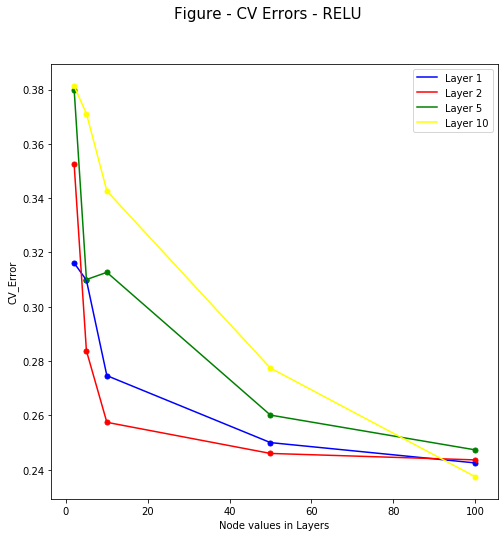

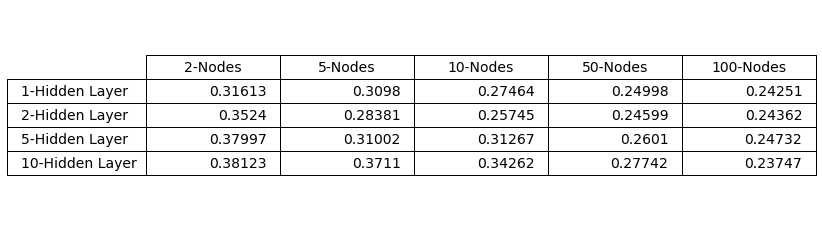

In [71]:
#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
fig1 = mp.figure(figsize=(8, 8))

mp.scatter(nodes,cv_errors_1,s=25, c='blue')
line1 = mp.plot(nodes,cv_errors_1, label='Layer 1', color='blue')

mp.scatter(nodes,cv_errors_2,s=25, c='red')
line2 = mp.plot(nodes,cv_errors_2, label='Layer 2', color='red')

mp.scatter(nodes,cv_errors_5,s=25, c='green')
line3 = mp.plot(nodes,cv_errors_5, label='Layer 5', color='green')

mp.scatter(nodes,cv_errors_10,s=25, c='yellow')
line4 = mp.plot(nodes,cv_errors_10, label='Layer 10', color='yellow')

mp.legend(prop={'size': 10})

#specify the axes
mp.xlabel("Node values in Layers")
mp.ylabel("CV_Error")

#Labeling the plot
#mp.legend(['1'])
#mp.legend(legends)
fig1.suptitle('Figure - CV Errors - RELU', fontsize=15)


#table
fig = mp.figure()
table_vals = []

np_array = np.array(cv_errors_1)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals.append(round_to_tenths)

np_array = np.array(cv_errors_2)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals.append(round_to_tenths)

np_array = np.array(cv_errors_5)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals.append(round_to_tenths)

np_array = np.array(cv_errors_10)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals.append(round_to_tenths)

row_labels = ['1-Hidden Layer', '2-Hidden Layer', '5-Hidden Layer', '10-Hidden Layer']
col_labels = ['2-Nodes', '5-Nodes', '10-Nodes', '50-Nodes', '100-Nodes']
the_table = mp.table(cellText=table_vals,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(2, 2)

# Removing ticks and spines enables you to get the figure only with table
mp.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mp.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    mp.gca().spines[pos].set_visible(False)
mp.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.05)


#display the current graph
mp.show()

### Best Model 1 - 10 Layers and 100 nodes each

In [72]:
model1 = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100, 100), activation='relu', solver='adam', alpha=0, max_iter=10000, epsilon=0.001)

In [73]:
cv_scores = cross_val_score(model1, trainFeatures, trainLabels, cv=10)
print(cv_scores)
print(cv_scores.mean())

[0.74074074 0.77777778 0.74074074 0.72839506 0.67901235 0.78481013
 0.6835443  0.7721519  0.7721519  0.73417722]
0.7413502109704642


### LAYER 1 - TANH

In [74]:
cv_scores_1 = []
cv_errors_1 = []
run_times_1 = []
for n in nodes:
    start_time = time.time()*1000
    #Neural Network Model 
    print('LAYER-1; NODES-{}'.format(n))
    perceptron = MLPClassifier(hidden_layer_sizes=(n), activation='tanh', solver='adam', alpha=0, max_iter=10000, epsilon=0.001)
    print(perceptron)
    
    #Cross-validation scores
    cv_score = cross_val_score(perceptron, trainFeatures, trainLabels, cv=10)
    cv_mean = np.mean(cv_score)
    print(cv_score)
    cv_scores_1.append(cv_mean)
    print("Cross validation Mean:", cv_mean)
    
    #Cross-validation errors
    cv_error = 1-cv_mean
    cv_errors_1.append(cv_error)
    print('Cross validation error:', cv_error)
    end_time = time.time()*1000
    runtime = end_time - start_time
    run_times_1.append(runtime)
    print('Run Time:', runtime)

LAYER-1; NODES-2
MLPClassifier(activation='tanh', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=2, learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
[0.66666667 0.71604938 0.72839506 0.71604938 0.62962963 0.65822785
 0.65822785 0.70886076 0.67088608 0.74683544]
Cross validation Mean: 0.6899828098140335
Cross validation error: 0.3100171901859665
Run Time: 3714.303466796875
LAYER-1; NODES-5
MLPClassifier(activation='tanh', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=5, learning_rate='constant',
              learning_rate_init=0.001, max_iter=10

### LAYER 2 - TANH

In [75]:
cv_scores_2 = []
cv_errors_2 = []
run_times_2 = []
for n in nodes:
    start_time = time.time()*1000
    #Neural Network Model 
    print('LAYER-2; NODES-{}'.format(n))
    perceptron = MLPClassifier(hidden_layer_sizes=(n, n), activation='tanh', solver='adam', alpha=0, max_iter=10000, epsilon=0.001)
    print(perceptron)
    
    #Cross-validation scores
    cv_score = cross_val_score(perceptron, trainFeatures, trainLabels, cv=10)
    cv_mean = np.mean(cv_score)
    print(cv_score)
    cv_scores_2.append(cv_mean)
    print("Cross validation Mean:", cv_mean)
    
    #Cross-validation errors
    cv_error = 1-cv_mean
    cv_errors_2.append(cv_error)
    print('Cross validation error:', cv_error)
    end_time = time.time()*1000
    runtime = end_time - start_time
    run_times_2.append(runtime)
    print('Run Time:', runtime)

LAYER-2; NODES-2
MLPClassifier(activation='tanh', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=(2, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
[0.72839506 0.67901235 0.74074074 0.69135802 0.67901235 0.6835443
 0.67088608 0.75949367 0.69620253 0.7721519 ]
Cross validation Mean: 0.7100796999531177
Cross validation error: 0.2899203000468823
Run Time: 8274.5859375
LAYER-2; NODES-5
MLPClassifier(activation='tanh', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_ite

### LAYER 5 - TANH

In [76]:
cv_scores_5 = []
cv_errors_5 = []
run_times_5 = []
for n in nodes:
    start_time = time.time()*1000
    #Neural Network Model 
    print('LAYER-5; NODES-{}'.format(n))
    perceptron = MLPClassifier(hidden_layer_sizes=(n, n, n, n, n), activation='tanh', solver='adam', alpha=0, max_iter=10000, epsilon=0.001)
    print(perceptron)
    
    #Cross-validation scores
    cv_score = cross_val_score(perceptron, trainFeatures, trainLabels, cv=10)
    cv_mean = np.mean(cv_score)
    print(cv_score)
    cv_scores_5.append(cv_mean)
    print("Cross validation Mean:", cv_mean)
    
    #Cross-validation errors
    cv_error = 1-cv_mean
    cv_errors_5.append(cv_error)
    print('Cross validation error:', cv_error)
    end_time = time.time()*1000
    runtime = end_time - start_time
    run_times_5.append(runtime)
    print('Run Time:', runtime)

LAYER-5; NODES-2
MLPClassifier(activation='tanh', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=(2, 2, 2, 2, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
[0.71604938 0.61728395 0.61728395 0.61728395 0.59259259 0.62025316
 0.65822785 0.72151899 0.6835443  0.73417722]
Cross validation Mean: 0.6578215346147835
Cross validation error: 0.34217846538521646
Run Time: 10541.065673828125
LAYER-5; NODES-5
MLPClassifier(activation='tanh', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=(5, 5, 5, 5, 5), learning_rate='constant',
              learnin

### LAYER 10 - TANH

In [77]:
cv_scores_10 = []
cv_errors_10 = []
run_times_10 = []
for n in nodes:
    start_time = time.time()*1000
    #Neural Network Model 
    print('LAYER-10; NODES-{}'.format(n))
    perceptron = MLPClassifier(hidden_layer_sizes=(n, n, n, n, n, n, n, n, n, n), activation='tanh', solver='adam', alpha=0, max_iter=10000, epsilon=0.001)
    print(perceptron)
    
    #Cross-validation scores
    cv_score = cross_val_score(perceptron, trainFeatures, trainLabels, cv=10)
    cv_mean = np.mean(cv_score)
    print(cv_score)
    cv_scores_10.append(cv_mean)
    print("Cross validation Mean:", cv_mean)
    
    #Cross-validation errors
    cv_error = 1-cv_mean
    cv_errors_10.append(cv_error)
    print('Cross validation error:', cv_error)
    end_time = time.time()*1000
    runtime = end_time - start_time
    run_times_10.append(runtime)
    print('Run Time:', runtime)

LAYER-10; NODES-2
MLPClassifier(activation='tanh', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=10000, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)
[0.61728395 0.61728395 0.61728395 0.69135802 0.61728395 0.62025316
 0.62025316 0.62025316 0.62025316 0.62025316]
Cross validation Mean: 0.6261759649945302
Cross validation error: 0.3738240350054698
Run Time: 5068.9990234375
LAYER-10; NODES-5
MLPClassifier(activation='tanh', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=(5, 5, 5, 5, 5, 5, 5, 5, 5, 5),
     

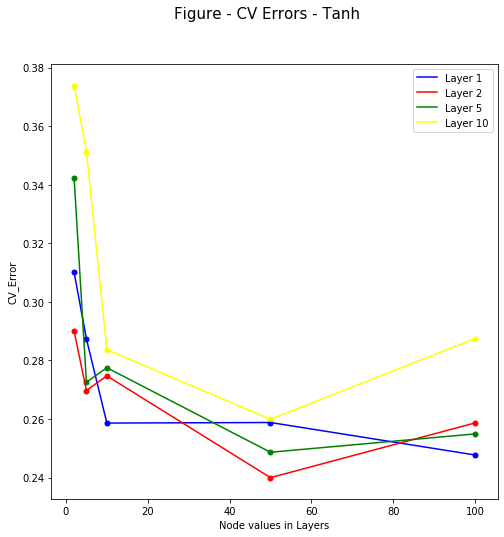

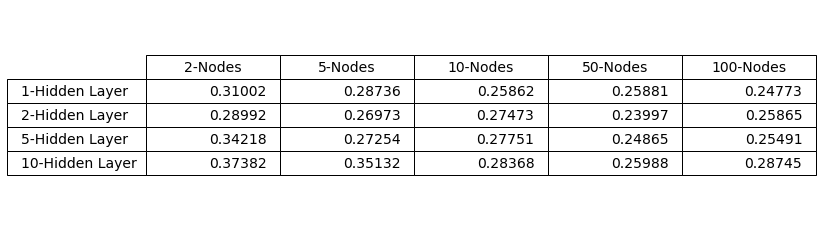

In [78]:
#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
fig1 = mp.figure(figsize=(8, 8))

mp.scatter(nodes,cv_errors_1,s=25, c='blue')
line1 = mp.plot(nodes,cv_errors_1, label='Layer 1', color='blue')

mp.scatter(nodes,cv_errors_2,s=25, c='red')
line2 = mp.plot(nodes,cv_errors_2, label='Layer 2', color='red')

mp.scatter(nodes,cv_errors_5,s=25, c='green')
line3 = mp.plot(nodes,cv_errors_5, label='Layer 5', color='green')

mp.scatter(nodes,cv_errors_10,s=25, c='yellow')
line4 = mp.plot(nodes,cv_errors_10, label='Layer 10', color='yellow')

mp.legend(prop={'size': 10})

#specify the axes
mp.xlabel("Node values in Layers")
mp.ylabel("CV_Error")

#Labeling the plot
#mp.legend(['1'])
#mp.legend(legends)
fig1.suptitle('Figure - CV Errors - Tanh', fontsize=15)


#table
fig = mp.figure()
table_vals = []

np_array = np.array(cv_errors_1)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals.append(round_to_tenths)

np_array = np.array(cv_errors_2)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals.append(round_to_tenths)

np_array = np.array(cv_errors_5)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals.append(round_to_tenths)

np_array = np.array(cv_errors_10)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals.append(round_to_tenths)

row_labels = ['1-Hidden Layer', '2-Hidden Layer', '5-Hidden Layer', '10-Hidden Layer']
col_labels = ['2-Nodes', '5-Nodes', '10-Nodes', '50-Nodes', '100-Nodes']
the_table = mp.table(cellText=table_vals,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(2, 2)

# Removing ticks and spines enables you to get the figure only with table
mp.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mp.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    mp.gca().spines[pos].set_visible(False)
mp.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.05)


#display the current graph
mp.show()

### Best Model 2 - Tanh - 2 Layers & 50 Nodes each

In [82]:
model2 = MLPClassifier(hidden_layer_sizes=(50, 50), activation='tanh', solver='adam', alpha=0, max_iter=10000, epsilon=0.001)

In [83]:
cv_scores = cross_val_score(model2, trainFeatures, trainLabels, cv=10)
print(cv_scores)
print(cv_scores.mean())

[0.62962963 0.7654321  0.69135802 0.75308642 0.66666667 0.84810127
 0.75949367 0.70886076 0.73417722 0.75949367]
0.7316299421784654


#### CHANGING NODES

In [84]:
layers = [1,2,5,10]
nodes = [16,32,64,128]

### LAYER 1 - RELU - NODES VARIATION

In [85]:
cv_scores_1 = []
cv_errors_1 = []
run_times_1 = []
for n in nodes:
    start_time = time.time()*1000
    #Neural Network Model 
    print('LAYER-1; NODES-{}'.format(n))
    perceptron = MLPClassifier(hidden_layer_sizes=(n), activation='relu', solver='adam', alpha=0, max_iter=10000, epsilon=0.001)
    print(perceptron)
    
    #Cross-validation scores
    cv_score = cross_val_score(perceptron, trainFeatures, trainLabels, cv=10)
    cv_mean = np.mean(cv_score)
    print(cv_score)
    cv_scores_1.append(cv_mean)
    print("Cross validation Mean:", cv_mean)
    
    #Cross-validation errors
    cv_error = 1-cv_mean
    cv_errors_1.append(cv_error)
    print('Cross validation error:', cv_error)
    end_time = time.time()*1000
    runtime = end_time - start_time
    run_times_1.append(runtime)
    print('Run Time:', runtime)

LAYER-1; NODES-16
MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=16, learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
[0.75308642 0.72839506 0.7654321  0.82716049 0.67901235 0.73417722
 0.73417722 0.72151899 0.72151899 0.7721519 ]
Cross validation Mean: 0.7436630723550555
Cross validation error: 0.25633692764494453
Run Time: 29402.372802734375
LAYER-1; NODES-32
MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=32, learning_rate='constant',
              learning_rate_init=0.001, max_i

### LAYER 2 - RELU - NODES VARIATION

In [86]:
cv_scores_2 = []
cv_errors_2 = []
run_times_2 = []
for n in nodes:
    start_time = time.time()*1000
    #Neural Network Model 
    print('LAYER-2; NODES-{}'.format(n))
    perceptron = MLPClassifier(hidden_layer_sizes=(n, n), activation='relu', solver='adam', alpha=0, max_iter=10000, epsilon=0.001)
    print(perceptron)
    
    #Cross-validation scores
    cv_score = cross_val_score(perceptron, trainFeatures, trainLabels, cv=10)
    cv_mean = np.mean(cv_score)
    print(cv_score)
    cv_scores_2.append(cv_mean)
    print("Cross validation Mean:", cv_mean)
    
    #Cross-validation errors
    cv_error = 1-cv_mean
    cv_errors_2.append(cv_error)
    print('Cross validation error:', cv_error)
    end_time = time.time()*1000
    runtime = end_time - start_time
    run_times_2.append(runtime)
    print('Run Time:', runtime)

LAYER-2; NODES-16
MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=(16, 16), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
[0.71604938 0.75308642 0.74074074 0.60493827 0.74074074 0.81012658
 0.72151899 0.69620253 0.75949367 0.73417722]
Cross validation Mean: 0.7277074542897328
Cross validation error: 0.2722925457102672
Run Time: 64619.787109375
LAYER-2; NODES-32
MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=(32, 32), learning_rate='constant',
              learning_rate_init=0.00

### LAYER 5 - RELU - NODES VARIATION

In [87]:
cv_scores_5 = []
cv_errors_5 = []
run_times_5 = []
for n in nodes:
    start_time = time.time()*1000
    #Neural Network Model 
    print('LAYER-5; NODES-{}'.format(n))
    perceptron = MLPClassifier(hidden_layer_sizes=(n, n, n, n, n), activation='relu', solver='adam', alpha=0, max_iter=10000, epsilon=0.001)
    print(perceptron)
    
    #Cross-validation scores
    cv_score = cross_val_score(perceptron, trainFeatures, trainLabels, cv=10)
    cv_mean = np.mean(cv_score)
    print(cv_score)
    cv_scores_5.append(cv_mean)
    print("Cross validation Mean:", cv_mean)
    
    #Cross-validation errors
    cv_error = 1-cv_mean
    cv_errors_5.append(cv_error)
    print('Cross validation error:', cv_error)
    end_time = time.time()*1000
    runtime = end_time - start_time
    run_times_5.append(runtime)
    print('Run Time:', runtime)

LAYER-5; NODES-16
MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=(16, 16, 16, 16, 16), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
[0.66666667 0.80246914 0.65432099 0.75308642 0.71604938 0.75949367
 0.69620253 0.6835443  0.6835443  0.72151899]
Cross validation Mean: 0.7136896390060947
Cross validation error: 0.2863103609939053
Run Time: 33328.015869140625
LAYER-5; NODES-32
MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=(32, 32, 32, 32, 32), learning_rate='constant',
          

### LAYER 10 - RELU - NODES VARITION 

In [88]:
cv_scores_10 = []
cv_errors_10 = []
run_times_10 = []
for n in nodes:
    start_time = time.time()*1000
    #Neural Network Model 
    print('LAYER-10; NODES-{}'.format(n))
    perceptron = MLPClassifier(hidden_layer_sizes=(n, n, n, n, n, n, n, n, n, n), activation='relu', solver='adam', alpha=0, max_iter=10000, epsilon=0.001)
    print(perceptron)
    
    #Cross-validation scores
    cv_score = cross_val_score(perceptron, trainFeatures, trainLabels, cv=10)
    cv_mean = np.mean(cv_score)
    print(cv_score)
    cv_scores_10.append(cv_mean)
    print("Cross validation Mean:", cv_mean)
    
    #Cross-validation errors
    cv_error = 1-cv_mean
    cv_errors_10.append(cv_error)
    print('Cross validation error:', cv_error)
    end_time = time.time()*1000
    runtime = end_time - start_time
    run_times_10.append(runtime)
    print('Run Time:', runtime)

LAYER-10; NODES-16
MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=(16, 16, 16, 16, 16, 16, 16, 16, 16, 16),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=10000, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)
[0.61728395 0.74074074 0.61728395 0.79012346 0.75308642 0.81012658
 0.63291139 0.62025316 0.64556962 0.62025316]
Cross validation Mean: 0.6847632442569151
Cross validation error: 0.31523675574308485
Run Time: 15748.493408203125
LAYER-10; NODES-32
MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=0.001,
              hidden_layer_sizes=(32, 32, 32, 32, 32, 

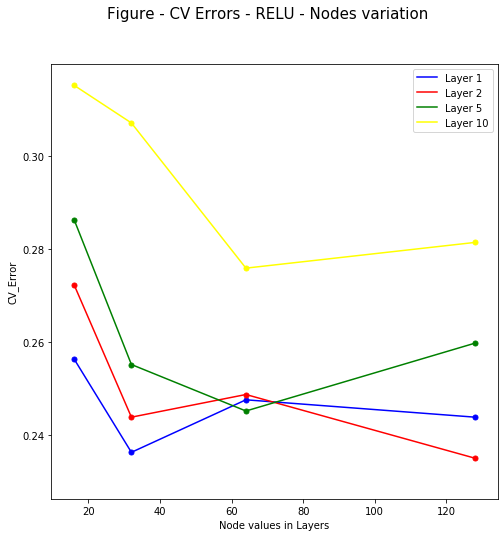

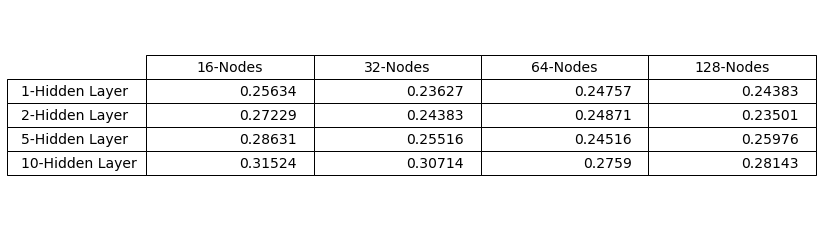

In [89]:
#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
fig1 = mp.figure(figsize=(8, 8))

mp.scatter(nodes,cv_errors_1,s=25, c='blue')
line1 = mp.plot(nodes,cv_errors_1, label='Layer 1', color='blue')

mp.scatter(nodes,cv_errors_2,s=25, c='red')
line2 = mp.plot(nodes,cv_errors_2, label='Layer 2', color='red')

mp.scatter(nodes,cv_errors_5,s=25, c='green')
line3 = mp.plot(nodes,cv_errors_5, label='Layer 5', color='green')

mp.scatter(nodes,cv_errors_10,s=25, c='yellow')
line4 = mp.plot(nodes,cv_errors_10, label='Layer 10', color='yellow')

mp.legend(prop={'size': 10})

#specify the axes
mp.xlabel("Node values in Layers")
mp.ylabel("CV_Error")

#Labeling the plot
#mp.legend(['1'])
#mp.legend(legends)
fig1.suptitle('Figure - CV Errors - RELU - Nodes variation', fontsize=15)


#table
fig = mp.figure()
table_vals = []

np_array = np.array(cv_errors_1)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals.append(round_to_tenths)

np_array = np.array(cv_errors_2)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals.append(round_to_tenths)

np_array = np.array(cv_errors_5)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals.append(round_to_tenths)

np_array = np.array(cv_errors_10)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals.append(round_to_tenths)

row_labels = ['1-Hidden Layer', '2-Hidden Layer', '5-Hidden Layer', '10-Hidden Layer']
col_labels = ['16-Nodes', '32-Nodes', '64-Nodes', '128-Nodes']
the_table = mp.table(cellText=table_vals,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(2, 2)

# Removing ticks and spines enables you to get the figure only with table
mp.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mp.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    mp.gca().spines[pos].set_visible(False)
mp.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.05)


#display the current graph
mp.show()

### Best Model 3 - RELU - 2 Layer 128 nodes

In [94]:
model3 = MLPClassifier(hidden_layer_sizes=(128, 128), activation='relu', solver='adam', alpha=0, max_iter=10000, epsilon=0.001)

In [95]:
cv_scores = cross_val_score(model3, trainFeatures, trainLabels, cv=10)
print(cv_scores)
print(cv_scores.mean())

[0.71604938 0.7654321  0.71604938 0.7654321  0.7654321  0.84810127
 0.72151899 0.73417722 0.72151899 0.83544304]
0.7589154555399281


### TEST SCORES

In [96]:
optimal_model = model3

In [97]:
cv_scores = cross_val_score(optimal_model, trainFeatures, trainLabels, cv=10)
optimal_model.fit(trainFeatures, trainLabels)
print(cv_scores)
print(cv_scores.mean())

[0.71604938 0.80246914 0.77777778 0.74074074 0.79012346 0.82278481
 0.70886076 0.70886076 0.74683544 0.75949367]
0.7573995936865137


In [98]:
score = optimal_model.score(testFeatures, testLabels)
nn_error = 1-score
print(score)
print(nn_error)

0.815
0.18500000000000005


### QUESTION 1

Answer - The hyperparameters that I selected for the final model are with 2 layers with 128 nodes each. The activation function is RELU and the learning rate is default which is 0.001 and max iterations are 10000. All other parameters are default. I have selected this model because it has the least cross validation error(i.e., 0.23501) among all the other models I have tried with other different parameters. 
I didnot find anything unusual happening while training and searching for the models.

### QUESTION 2 - HOEFFDING BOUND

In [104]:
def hoeffding(test_samples, confidence_interval):
    prob = (100 - confidence_interval)/100
    a = math.sqrt(np.log(2/prob)/(2*test_samples))
    return a

In [105]:
test_length = len(testFeatures)
print(test_length)

200


In [106]:
confidence_interval = 95
bound = hoeffding(test_length, confidence_interval)
print("Hoeffding bound for test data - 95% confidence interval:", bound)

Hoeffding bound for test data - 95% confidence interval: 0.09603227913199208


Answer: The Hoeffding bound for test data with 95% confidence interval: 0.09603. I have taken 20% of the data for testing. i.e., 20% of 1000 rows is 200 data points. So the final error on test set is test_error +/- hoeffding bound. Therefore it is 0.185+/-0.09603.

### QUESTION 3 - RANDOMNESS

Answer:
Point 1: Since neural networks use random weights while starting, sometimes the same model can give different results. i.e., the cross validation errors might change.
Point 2: There may be different local minimas in our model. Due to random weights initialization, each time the model might find different local minimas and hence our result might change when we run multiple times.
Point 3: 


### QUESTION 4 - MODEL NOT OVERFITTING

Answer: I model I have choosen does not overfit the data because from the cross validation errors I can say that the errors are almost constant and also I got an accuracy of 76% which shows that the model is not overfitting. Also the test accuracy is around 82% which shows the model does a good job in predicting the test data or unseen data.
